<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

### Unsupervised Learning Project: 2401FTDS Team JB1
© ExploreAI Academy

## 1. Project Overview
<a class="anchor" id="1-project-overview"></a>

## 2. Importing Packages
<a class = "anchor" id="2-importing-packages"></a>

In [2]:
# data processing
import numpy as np
import pandas as pd
import re
from scipy import stats
import logging
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
## 3. Loading Data
The data used for this project was located in the anime.csv, test.csv, and train.csv file. To better manipulate and analyse the anime.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv() and referred to as titles_import. For demonstrating the column index in the dataframe , index_col=False was implemented.

In [3]:
# Load the datasets
train_df = pd.read_csv('train.csv', index_col=False)
test_df = pd.read_csv('test.csv', index_col=False)
anime_df = pd.read_csv('anime.csv', index_col=False)

# Display the first few rows of the training dataset
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the anime_df.copy() method and referred to as `anime_df_copy`.
</div>

In [4]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
anime_df_copy = anime_df.copy()

#### Inspect the Dataset

Examine the structure of the dataset to understand the types of data and identify any potential issues.

In [5]:
# Check the data types and missing values
print(train_df_copy.info())
print(test_df_copy.info())
print(anime_df_copy.info())

# Get a summary of the dataset
print(train_df_copy.describe(include='all'))
print(test_df_copy.describe(include='all'))
print(anime_df_copy.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members 

In [6]:
anime_df_copy.shape

(12294, 7)

Results : The dataset consists of 12294 rows (observations) and 7 columns (features).

A look at the summary information of the dataframe by using `.info` and `.shape`.

In [7]:
anime_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
anime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


---
# 4. Data Cleaning

<div class="alert alert-block alert-info">
We cleaned the data through text preprocessing and handling missing values and checked for and found one duplicate row. Finally, we validated and saved the data to avoid re-cleaning, ensuring it is reliable and trustworthy.
</div>


In [9]:
def check_and_clean_data(anime_df_copy):
    """
    Check and clean the dataset by:
    1. Printing the count of null values for each column.
    2. Printing the missing values.
    3. Filling or dropping null values.
    4. Dropping duplicate rows.
    5. Performing basic preprocessing such as stripping whitespace and converting text to lowercase.

    Parameters:
    anime_df_copy (pandas.DataFrame): The DataFrame to check and clean.

    Returns:
    pandas.DataFrame: The cleaned DataFrame.
    """
    # Check for null values
    null_counts = anime_df_copy.isnull().sum()
    if null_counts.sum() > 0:
        print("Columns with missing values:")
        print(null_counts[null_counts > 0])
        print("\n")
        
        for column in anime_df_copy.columns:
            missing_rows = anime_df_copy[column].isnull()
            if missing_rows.any():
                print(f"Missing values in '{column}':")
                print(anime_df_copy[missing_rows][[column]])
                print("\n")
            
            # Fill or drop null values as needed
            if anime_df_copy[column].dtype == 'object':
                anime_df_copy[column] = anime_df_copy[column].fillna('unknown')  # Filling null object columns with 'unknown'
            else:
                anime_df_copy[column] = anime_df_copy[column].fillna(anime_df_copy[column].median())  # Filling null numeric columns with median

    # Count and drop duplicate rows
    duplicate_count = anime_df_copy.duplicated().sum()
    print(f'The dataset has {duplicate_count} duplicate rows.')
    anime_df_copy = anime_df_copy.drop_duplicates()

    # Basic preprocessing: strip whitespace and convert to lowercase
    for column in anime_df_copy.select_dtypes(include='object').columns:
        anime_df_copy[column] = anime_df_copy[column].str.strip().str.lower()

    return anime_df_copy

In [10]:
cleaned_anime_df = check_and_clean_data(anime_df_copy)

Columns with missing values:
genre      62
type       25
rating    230
dtype: int64


Missing values in 'genre':
      genre
2844    NaN
3541    NaN
6040    NaN
6646    NaN
7018    NaN
...     ...
11070   NaN
11086   NaN
11097   NaN
11112   NaN
11113   NaN

[62 rows x 1 columns]


Missing values in 'type':
      type
10898  NaN
10900  NaN
10906  NaN
10907  NaN
10918  NaN
10949  NaN
10963  NaN
10983  NaN
10988  NaN
10990  NaN
10991  NaN
10994  NaN
10995  NaN
10998  NaN
11010  NaN
11013  NaN
11041  NaN
11053  NaN
11055  NaN
11058  NaN
11062  NaN
11070  NaN
11101  NaN
12252  NaN
12259  NaN


Missing values in 'rating':
       rating
8968      NaN
9657      NaN
10896     NaN
10897     NaN
10898     NaN
...       ...
12274     NaN
12279     NaN
12280     NaN
12282     NaN
12285     NaN

[230 rows x 1 columns]


The dataset has 0 duplicate rows.


In [11]:
print(cleaned_anime_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [12]:

def clean_anime_data(anime_df_copy):
    # Initialize logging
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)

    # Convert 'episodes' column to numeric and handle non-numeric values
    try:
        anime_df_copy['episodes'] = pd.to_numeric(anime_df_copy['episodes'], errors='coerce')
        anime_df_copy['episodes'].fillna(anime_df_copy['episodes'].median(), inplace=True)
        logger.info("'episodes' column converted to numeric and missing values handled.")
    except Exception as e:
        logger.error(f"Error processing 'episodes' column: {e}")

    # One-hot encode 'genre' column
    try:
        genres = anime_df_copy['genre'].str.get_dummies(sep=',')
        anime_df_copy = pd.concat([anime_df_copy, genres], axis=1)
        anime_df_copy.drop('genre', axis=1, inplace=True)
        logger.info("'genre' column one-hot encoded.")
    except Exception as e:
        logger.error(f"Error processing 'genre' column: {e}")

    # Normalize 'rating' column
    try:
        anime_df_copy['rating'] = (anime_df_copy['rating'] - anime_df_copy['rating'].min()) / (anime_df_copy['rating'].max() - anime_df_copy['rating'].min())
        logger.info("'rating' column normalized.")
    except Exception as e:
        logger.error(f"Error normalizing 'rating' column: {e}")

    # Handle outliers in 'members' and 'rating' columns
    try:
        z_scores = stats.zscore(anime_df_copy[['members', 'rating']])
        abs_z_scores = abs(z_scores)
        filtered_entries = (abs_z_scores < 3).all(axis=1)
        anime_df_copy = anime_df_copy[filtered_entries]
        logger.info("Outliers handled in 'members' and 'rating' columns.")
    except Exception as e:
        logger.error(f"Error handling outliers: {e}")

    # Enhance text preprocessing for 'name' column
    try:
        anime_df_copy['name'] = anime_df_copy['name'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))
        logger.info("Text preprocessing done for 'name' column.")
    except Exception as e:
        logger.error(f"Error preprocessing text in 'name' column: {e}")

    # Validate data types
    try:
        logger.info(f"Data types after cleaning:\n{anime_df_copy.dtypes}")
    except Exception as e:
        logger.error(f"Error validating data types: {e}")

    return anime_df_copy

In [13]:
cleaned_anime_df = clean_anime_data(anime_df_copy)
if cleaned_anime_df is not None:
    cleaned_anime_df.to_csv('cleaned_anime.csv', index=False)
    print("Cleaned dataset saved to 'cleaned_anime.csv'.")

INFO:__main__:'episodes' column converted to numeric and missing values handled.
INFO:__main__:'genre' column one-hot encoded.
INFO:__main__:'rating' column normalized.
INFO:__main__:Outliers handled in 'members' and 'rating' columns.
INFO:__main__:Text preprocessing done for 'name' column.
INFO:__main__:Data types after cleaning:
anime_id          int64
name             object
type             object
episodes        float64
rating          float64
                 ...   
Supernatural      int64
Thriller          int64
Vampire           int64
Yaoi              int64
unknown           int64
Length: 89, dtype: object


Cleaned dataset saved to 'cleaned_anime.csv'.


In [14]:
# Check the data types and missing values
print(cleaned_anime_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11964 entries, 2 to 12293
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        11964 non-null  int64  
 1   name            11964 non-null  object 
 2   type            11964 non-null  object 
 3   episodes        11964 non-null  float64
 4   rating          11964 non-null  float64
 5   members         11964 non-null  int64  
 6    Adventure      11964 non-null  int64  
 7    Cars           11964 non-null  int64  
 8    Comedy         11964 non-null  int64  
 9    Dementia       11964 non-null  int64  
 10   Demons         11964 non-null  int64  
 11   Drama          11964 non-null  int64  
 12   Ecchi          11964 non-null  int64  
 13   Fantasy        11964 non-null  int64  
 14   Game           11964 non-null  int64  
 15   Harem          11964 non-null  int64  
 16   Hentai         11964 non-null  int64  
 17   Historical     11964 non-null  int6

In [15]:
cleaned_anime_df.head()

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,unknown
2,28977,Gintama,TV,51.0,0.909964,114262,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama039,TV,51.0,0.899160,151266,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu Karasuno Koukou VS Shiratorizawa Gakue...,TV,10.0,0.897959,93351,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,OVA,110.0,0.893157,80679,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15335,Gintama Movie Kanketsuhen Yorozuya yo Eien Nare,Movie,1.0,0.891957,72534,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA) of Anime Dataset

This notebook provides a detailed exploratory data analysis (EDA) of the anime dataset. We will explore the structure of the dataset, visualize the distributions of key features, and identify interesting patterns or correlations.


In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
anime_df = cleaned_anime_df.copy()

# Preview the first few rows of the dataset
anime_df.head()


,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,unknown
2,28977,Gintama,TV,51.0,0.909964,114262,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama039,TV,51.0,0.899160,151266,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu Karasuno Koukou VS Shiratorizawa Gakue...,TV,10.0,0.897959,93351,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,OVA,110.0,0.893157,80679,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,15335,Gintama Movie Kanketsuhen Yorozuya yo Eien Nare,Movie,1.0,0.891957,72534,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The `anime_df` dataset contains information about various anime. The columns include:
- `anime_id`: Unique identifier for each anime
- `name`: Name of the anime
- `type`: Type of anime (e.g., TV, Movie, OVA)
- `episodes`: Number of episodes
- `rating`: Average rating
- `members`: Number of members who have rated the anime
- Various genre columns (e.g., `Adventure`, `Comedy`, `Drama`, etc.), each indicating the presence (1) or absence (0) of the genre in the anime


In [17]:
# Display dataset information
anime_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11964 entries, 2 to 12293
Data columns (total 89 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        11964 non-null  int64  
 1   name            11964 non-null  object 
 2   type            11964 non-null  object 
 3   episodes        11964 non-null  float64
 4   rating          11964 non-null  float64
 5   members         11964 non-null  int64  
 6    Adventure      11964 non-null  int64  
 7    Cars           11964 non-null  int64  
 8    Comedy         11964 non-null  int64  
 9    Dementia       11964 non-null  int64  
 10   Demons         11964 non-null  int64  
 11   Drama          11964 non-null  int64  
 12   Ecchi          11964 non-null  int64  
 13   Fantasy        11964 non-null  int64  
 14   Game           11964 non-null  int64  
 15   Harem          11964 non-null  int64  
 16   Hentai         11964 non-null  int64  
 17   Historical     11964 non-null  int6

The dataset contains 11964 entries and 89 columns. Most columns are binary indicators for genres, with `anime_id`, `name`, `type`, `episodes`, `rating`, and `members` being key features.


In [18]:
# Summary statistics
anime_df.describe()


,anime_id,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,unknown
count,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,...,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000,11964.000000
mean,14035.651287,11.845035,0.575297,11789.645353,0.070796,0.003093,0.116851,0.002508,0.016215,0.081829,...,0.004096,0.008609,0.000084,0.003678,0.000084,0.001170,0.000084,0.000084,0.000251,0.005015
std,11452.526501,46.380168,0.115755,26326.348290,0.256494,0.055528,0.321256,0.050014,0.126308,0.274115,...,0.063869,0.092389,0.009142,0.060535,0.009142,0.034189,0.009142,0.009142,0.015834,0.070642
min,5.000000,1.000000,0.211285,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3481.750000,1.000000,0.507803,221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10211.500000,2.000000,0.588235,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24786.000000,12.000000,0.655462,8222.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34527.000000,1818.000000,0.939976,182224.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The summary statistics provide an overview of the numerical columns in the dataset. Key observations:
- The `episodes` column has a wide range, indicating the presence of both short and long series.
- The `rating` column ranges from 1 to 10, with an average rating around 6.5.
- The `members` column has a high standard deviation, indicating varying popularity among anime.


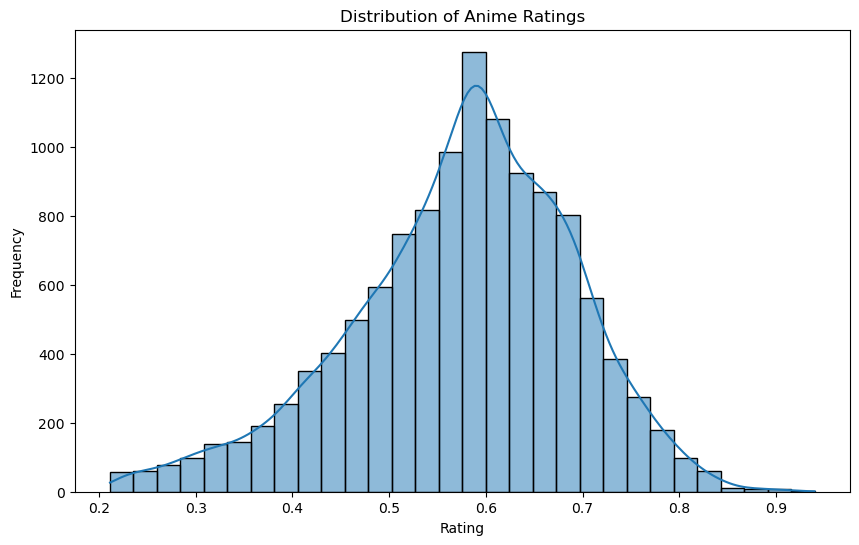

In [19]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Distribution of Anime Ratings

The distribution of anime ratings shows a near-normal distribution with a peak around a rating of 0.6. This suggests that most anime tend to have average ratings, with fewer anime receiving very low or very high ratings. The density plot (kde) overlay indicates a smooth distribution, emphasizing the central tendency and variability of the ratings.



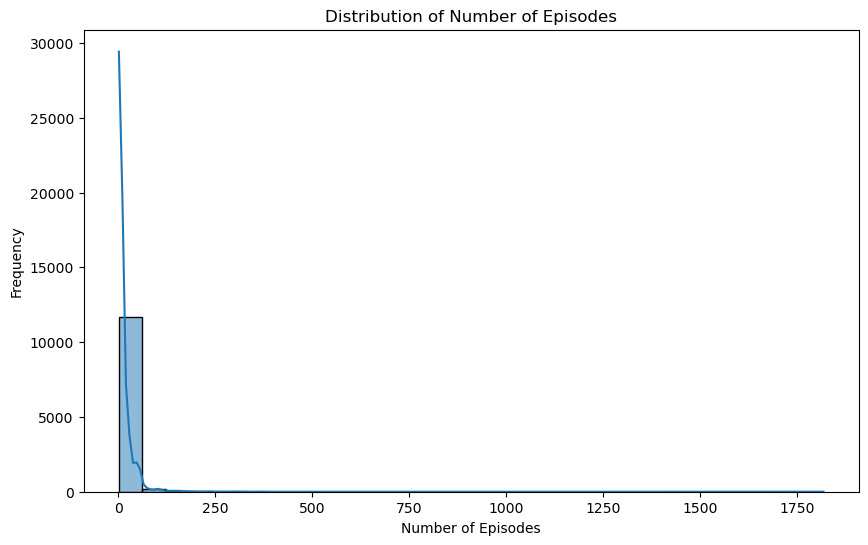

In [20]:
# Distribution of episodes
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['episodes'], bins=30, kde=True)
plt.title('Distribution of Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()


Distribution of Number of Episodes

The distribution of the number of episodes is highly skewed to the right, indicating that the majority of anime have a relatively low number of episodes. The plot shows a sharp decline after the initial few bins, with a long tail extending to the right. This suggests that while most anime series are short, there are a few long-running series with a significantly higher number of episodes.



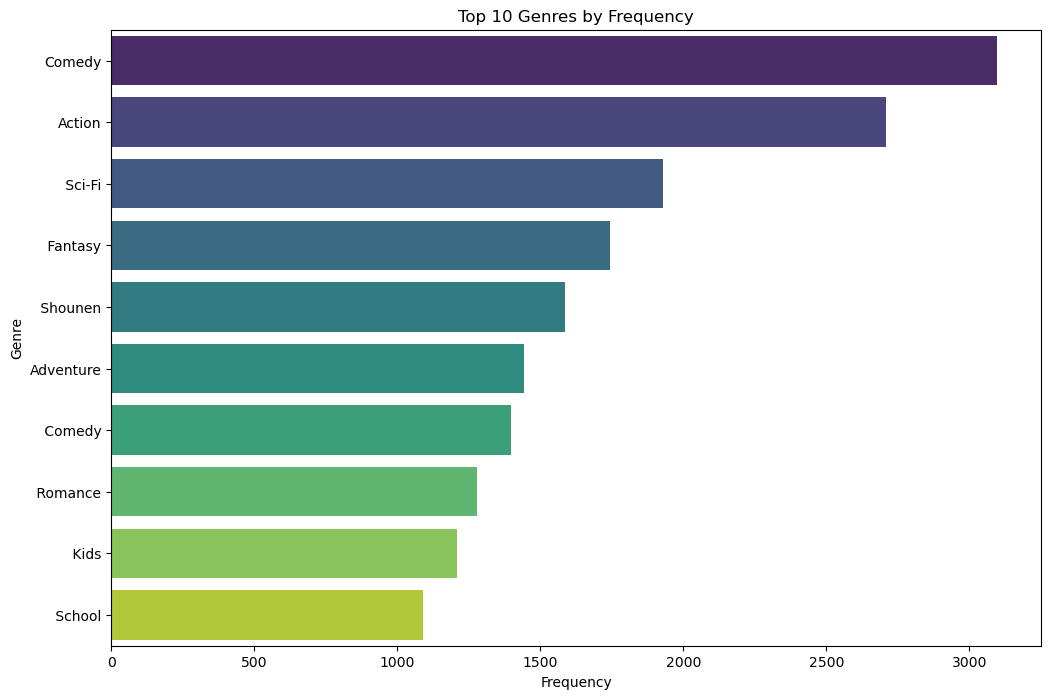

In [21]:
# Calculate the sum of each genre
genre_counts = anime_df.iloc[:, 6:].sum().sort_values(ascending=False)

# Plot the top 10 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


Top 10 Genres by Frequency

The bar plot of the top 10 genres by frequency reveals that 'Comedy' is the most common genre, followed by 'Action', 'Sci-Fi', and 'Fantasy'. This indicates a preference or trend towards lighter, more entertaining content as well as action-packed and science fiction themes. The presence of genres like 'Romance', 'Kids', and 'School' suggests a diverse range of interests among the anime audience.



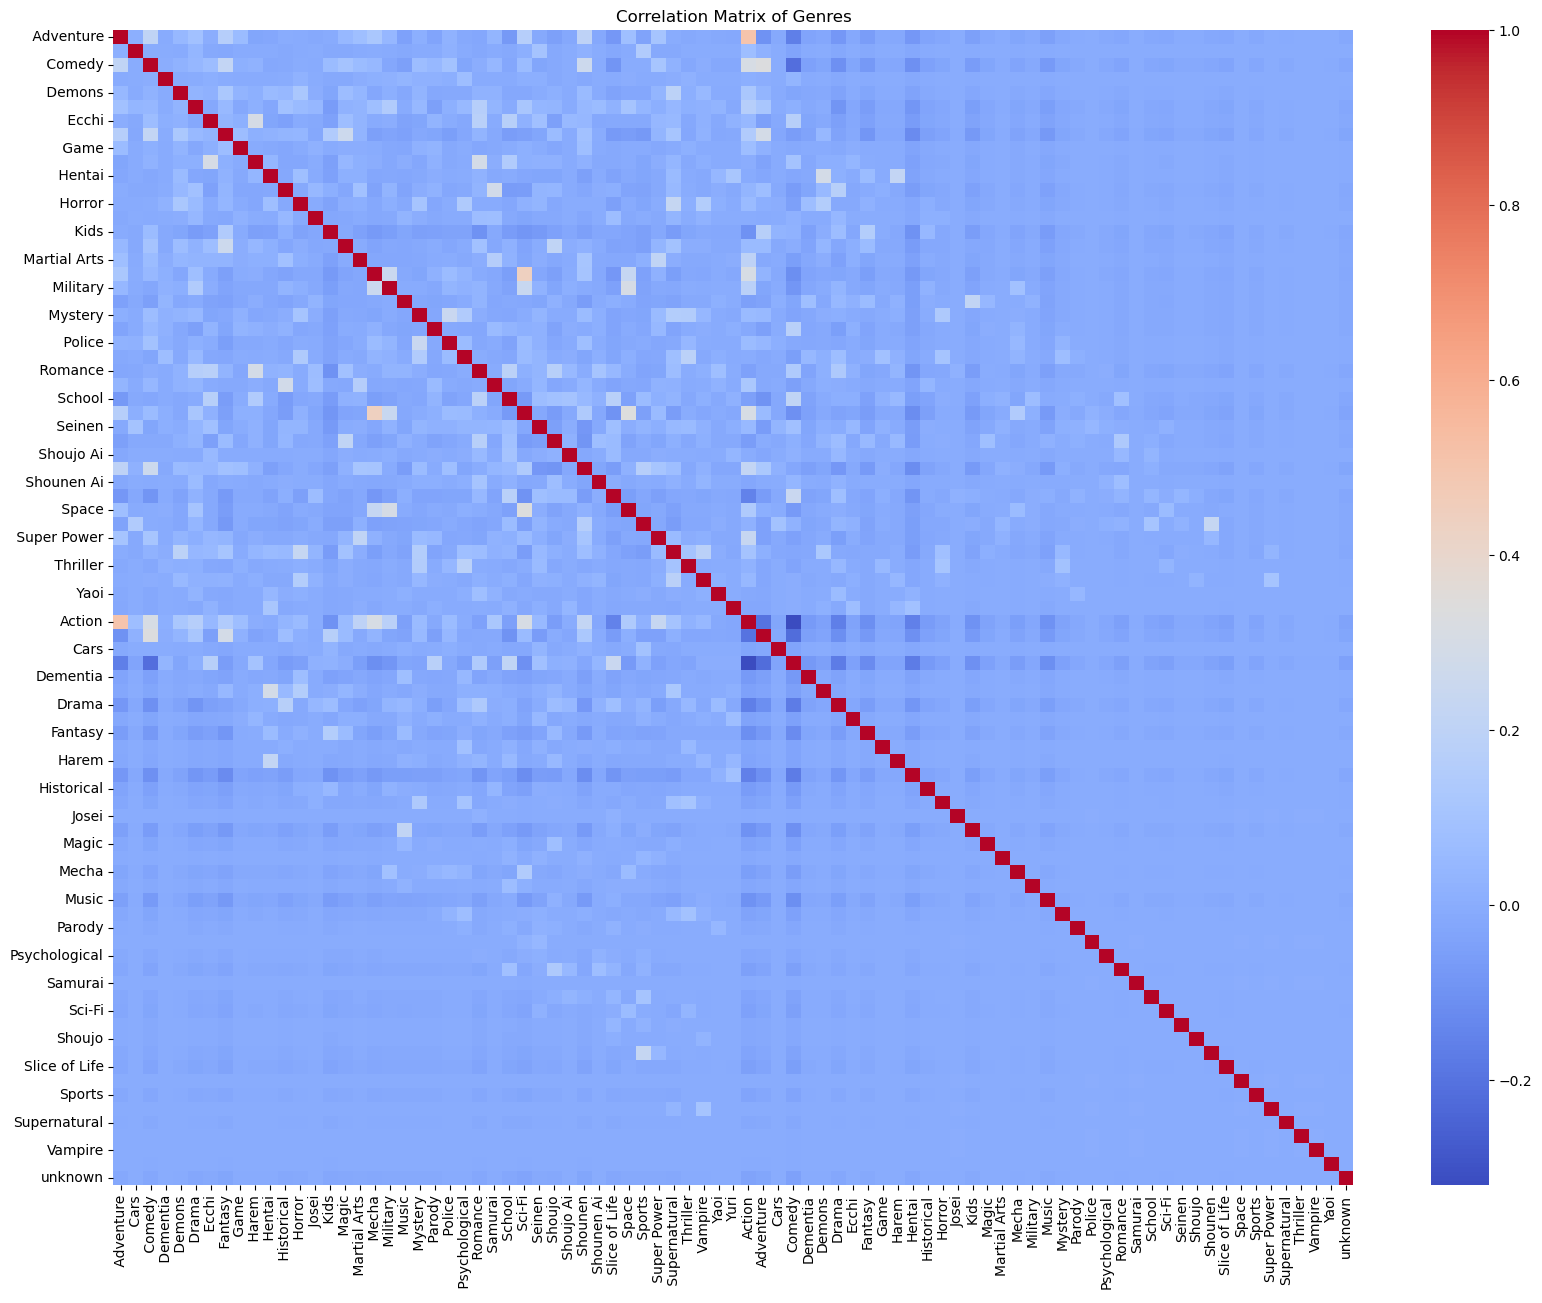

In [22]:
# Correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = anime_df.iloc[:, 6:].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Genres')
plt.show()


The correlation matrix shows the relationships between different genres. This helps us understand if certain genres tend to co-occur more frequently.
